### CHP-3 Linear Regression 
- Advertising data
- Data is available in this website : http://www-bcf.usc.edu/~gareth/ISL/index.html
- We  have data for the amount of money spent advertising on the TV, radio and  newspapers, and we may want to know     whether either of these Three media is associated with sales.

#### Reading data using pandas


In [2]:
#Imoprt pandas library 
import numpy as np
import pandas as pd

#import os
#os.getcwd()


In [3]:
Advertising=pd.read_csv('Data/Advertising.csv',index_col=0)
Advertising.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
Advertising.head()
#Advertising[:10]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
Advertising.shape


(200, 4)

#### What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- radio: advertising dollars spent on Radio
- newspaper: advertising dollars spent on Newspaper
#### What is the response?
- sales: sales of a single product in a given market (in thousands of items)
#### What else do we know?
- Because the response variable is continuous, this is a regression problem.
- There are 200 observations (represented by the rows), and each observation is a single market.

#### Visualizing data using seaborn

In [6]:
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline



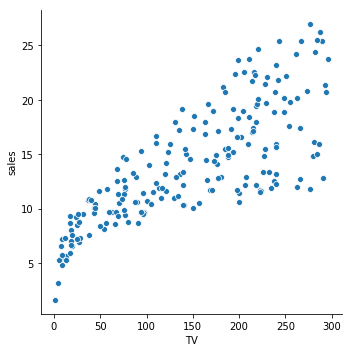

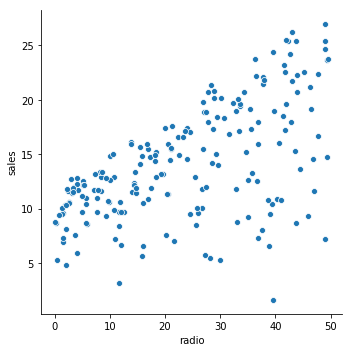

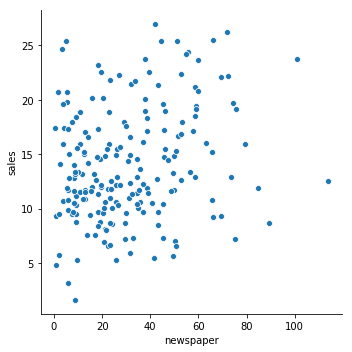

In [7]:
sns.relplot(x="TV", y="sales", data=Advertising)
sns.relplot(x="radio", y="sales", data=Advertising)
sns.relplot(x="newspaper", y="sales", data=Advertising)
#sns.scatterplot (x="newspaper", y="sales", data=Advertising)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


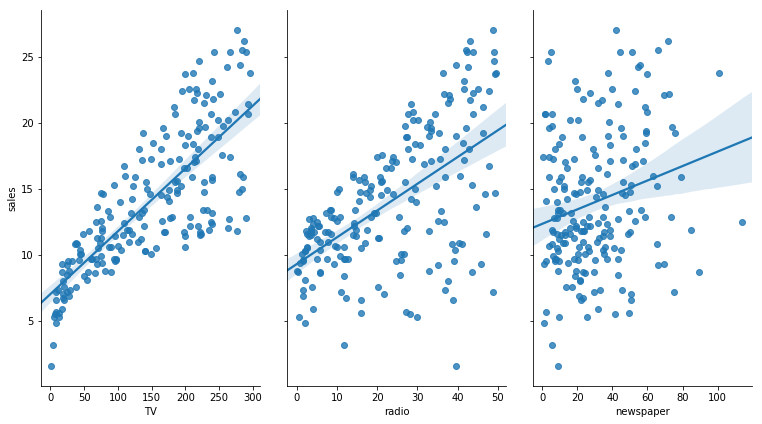

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(Advertising, x_vars=["TV", "radio", "newspaper"], y_vars=["sales"], height=6, aspect=0.6, kind="reg")


#### Preparing X and Y using pandas
- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [14]:
x=Advertising[["TV", "radio", "newspaper"]]
y=Advertising['sales']
print(type(x))
print(type(y))
x.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [11]:

print(y.head())

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


### Spliting X  and  Y in Train and Test data

In [62]:
from sklearn.model_selection import train_test_split
#test_size defult =25%
x_train, x_test,y_train ,y_test =train_test_split(x,y,test_size=0.25
                                                  , random_state=1)

In [86]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(150, 3)
(150,)
(50, 3)
(50,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 99 to 38
Data columns (total 3 columns):
TV           150 non-null float64
radio        150 non-null float64
newspaper    150 non-null float64
dtypes: float64(3)
memory usage: 4.7 KB


### Linear regression in scikit-learn 


In [64]:
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression 
# Create linear regression object
linreg=linear_model.LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting model coefficients

In [74]:
# print the intercept and coefficients
print('Intercept: \n',linreg.intercept_)
# The coefficients
print('Coefficients: \n', linreg.coef_)

Intercept: 
 2.8769666223179318
Coefficients: 
 [0.04656457 0.17915812 0.00345046]


In [66]:
# pair the feature names with the coefficients
feature_cols = ['TV', 'Radio', 'Newspaper']
list(zip(feature_cols, linreg.coef_))


[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.003450464711180379)]

  y= $\beta_0$ +$\beta_1$x1+$\beta_2$x2+$\beta_3$x3 
 $$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Making the prediction 

In [69]:
# Make predictions using the testing set
y_pred = linreg.predict(x_test)


array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

Text(0,0.5,'Predicted')

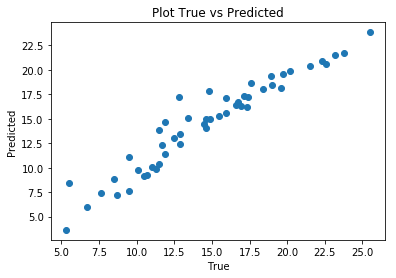

In [102]:
# Plot TRUE Vs Predicted
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.title("Plot True vs Predicted")
plt.xlabel("True")
plt.ylabel("Predicted")
#plt.show()

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [107]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
#Root mean squared error
print('Root mean squared error: %.2f' % np.sqrt(
    mean_squared_error(y_test, y_pred)))


Mean squared error: 1.97
Variance score: 0.92
Root mean squared error: 1.40


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [112]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = Advertising[feature_cols]

# select a Series from the DataFrame
y = Advertising.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 1.39


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.